# Pima Indians Diabetes Challenge

피마 인디언 당뇨병 데이터 세트를 이용해 당뇨병 여부를 판단하는 예측 모델 만들기

- binary (2-class) classification problem

## Import package

In [1]:
import pandas as pd
import numpy as np
import missingno as msno

import sys
import warnings
warnings.filterwarnings('ignore')

## Load Data

In [2]:
df_train = pd.read_csv('../../../input/pima_indian/diabetes.csv')

In [3]:
df_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
print(df_train.shape)

(768, 9)


### Column 자료형 확인

- infro() : 각 column 정보 보기

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df_train['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

- features information
    - Pregnancies : 임신 횟수
    - Glucose : 포도당 부하 검사 수치
    - BloodPressure : 혈압(mm Hg)
    - SkinThickness : 팔 삼두근 뒤쪽의 피하지방 측정값(mm)
    - Insulin : 혈청 인슐린 (mu U/ml)
    - BMI : 체질량지수(체중(kg)/(키(m))^2)
    - DiabetesPedigreeFunction : 당뇨 내력 가중치 값
    - Age : 나이
    - Outcome : 클래스 결정 값(0 or 1) 

## Exploratory Data Analysis (EDA)

### Visualization

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

#### Correlation

In [8]:
df_train.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

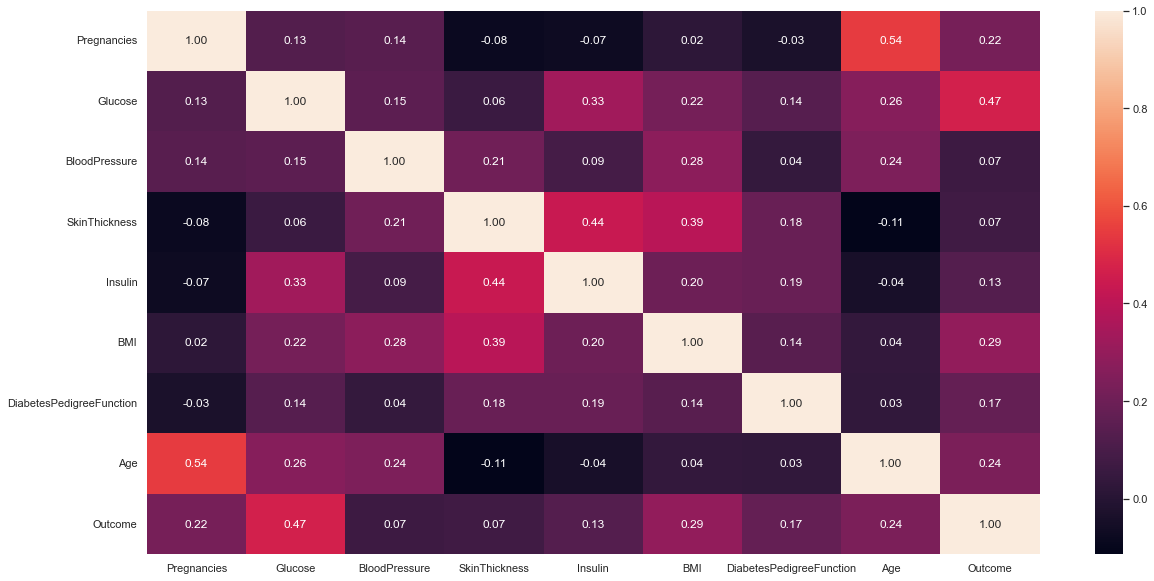

In [9]:
plt.figure(figsize=(20,10))
sns.heatmap(df_train.corr(),annot=True,fmt='.2f')

=> Outcome과 correlation이 적어 보이는 features : BloodPressure, SkinThickness

In [10]:
df_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


=> min 값이 '0'인 feature들이 다수 존재

## Train, Valid, Test dataset

train/test data set 준비

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
features_drop=['BloodPressure','Outcome']

In [13]:
df_train_data = df_train.drop(features_drop, axis=1)

In [14]:
df_train_label = df_train['Outcome']

In [15]:
x_train, x_test, train_label, test_label = train_test_split(df_train_data, df_train_label, test_size=0.2, random_state=156)

In [16]:
x_train.head()

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
435,0,141,0,0,42.4,0.205,29
671,1,99,10,0,25.4,0.551,21
744,13,153,37,140,40.6,1.174,39
412,1,143,23,310,42.4,1.076,22
370,3,173,48,465,38.4,2.137,25


In [17]:
x_test.head()

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
306,10,161,23,132,25.5,0.326,47
628,5,128,0,0,34.6,0.144,45
333,12,106,0,0,23.6,0.137,44
388,5,144,26,285,32.0,0.452,58
97,1,71,18,76,20.4,0.323,22


## PreProcessing

'zero' data 채우기

In [18]:
zero_features = ['Glucose','SkinThickness','Insulin','BMI']

In [19]:
def hist_plot(df_data, features):
    for feature in features:
        df_data[feature].plot(kind='hist',bins=100).set_title('Histogram of ' + feature)
        plt.show()

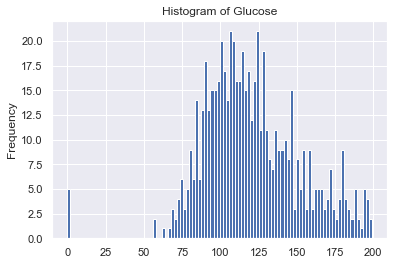

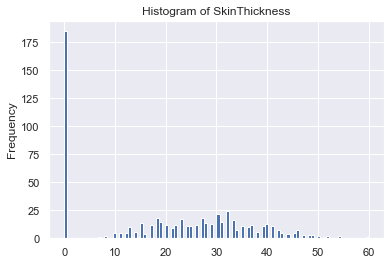

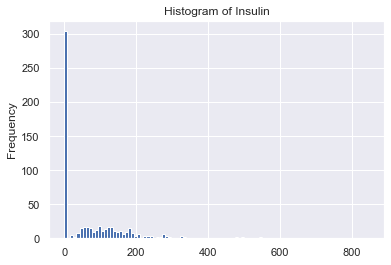

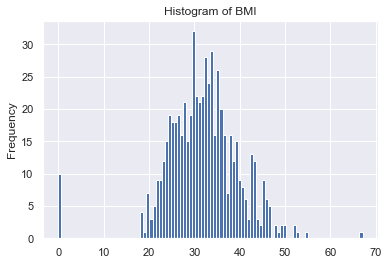

In [20]:
hist_plot(x_train, zero_features)

In [21]:
zero_count = []
zero_percent = []

for feature in zero_features:
    zero_num = x_train[x_train[feature] == 0][feature].shape[0]
    zero_count.append(zero_num)
    zero_percent.append(np.round(zero_num/x_train.shape[0]*100,2))

df_zero_data_of_train = pd.DataFrame([zero_count, zero_percent], columns=zero_features, index=['count', 'percent(%)']).T

df_zero_data_of_train

,count,percent(%)
Glucose,5.0,0.81
SkinThickness,185.0,30.13
Insulin,304.0,49.51
BMI,10.0,1.63


In [22]:
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [23]:
x_train[zero_features] = x_train[zero_features].replace(0, np.nan)
x_test[zero_features] = x_test[zero_features].replace(0, np.nan)

In [24]:
x_train.head()

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
435,0,141.0,NaN,NaN,42.4,0.205,29
671,1,99.0,10.0,NaN,25.4,0.551,21
744,13,153.0,37.0,140.0,40.6,1.174,39
412,1,143.0,23.0,310.0,42.4,1.076,22
370,3,173.0,48.0,465.0,38.4,2.137,25


1. Impute value with mean()

In [25]:
# simple_imputer = SimpleImputer(missing_values = np.nan, strategy='mean')
# trans_x_train = simple_imputer.fit_transform(x_train)
# trans_x_train = pd.DataFrame(trans_x_train, columns=x_train.columns, index=list(x_train.index.values))


# trans_x_test = simple_imputer.transform(x_test)
# trans_x_test = pd.DataFrame(trans_x_test, columns=x_test.columns, index=list(x_test.index.values))

2. Impute value with Impute() Function

- KNNImputer : NA값의 가장가까운 주변 k개의 평균을 NA값으로 대체하는 알고리즘

In [26]:
knn_imputer = KNNImputer(n_neighbors=2, weights='uniform')
trans_x_train = knn_imputer.fit_transform(x_train)
trans_x_train = pd.DataFrame(trans_x_train, columns=x_train.columns, index=list(x_train.index.values))


trans_x_test = knn_imputer.transform(x_test)
trans_x_test = pd.DataFrame(trans_x_test, columns=x_test.columns, index=list(x_test.index.values))

- IterativeImputer : Round robin 방식을 반복하여 결측 값을 회귀하는 방식으로 결측치를 처리하는 알고리즘  
결측 값을 회귀하는 방식으로 처리하기 때문에 이 방식은 수치형 변수에만 사용할 수 있음

In [27]:
# iter_imputer = IterativeImputer(random_state=2)
# trans_x_train = iter_imputer.fit_transform(x_train)
# trans_x_train = pd.DataFrame(trans_x_train, columns=x_train.columns, index=list(x_train.index.values))


# trans_x_test = iter_imputer.transform(x_test)
# trans_x_test = pd.DataFrame(trans_x_test, columns=x_test.columns, index=list(x_test.index.values))

In [28]:
zero_count = []
zero_percent = []

for feature in zero_features:
    zero_num = trans_x_train[trans_x_train[feature] == 0][feature].shape[0]
    zero_count.append(zero_num)
    zero_percent.append(np.round(zero_num/trans_x_train.shape[0]*100,2))

df_zero_data_of_trans_train = pd.DataFrame([zero_count, zero_percent], columns=zero_features, index=['count', 'percent(%)']).T

df_zero_data_of_trans_train

,count,percent(%)
Glucose,0.0,0.0
SkinThickness,0.0,0.0
Insulin,0.0,0.0
BMI,0.0,0.0


In [29]:
zero_count = []
zero_percent = []

for feature in zero_features:
    zero_num = trans_x_test[trans_x_test[feature] == 0][feature].shape[0]
    zero_count.append(zero_num)
    zero_percent.append(np.round(zero_num/trans_x_test.shape[0]*100,2))

df_zero_data_of_trans_train = pd.DataFrame([zero_count, zero_percent], columns=zero_features, index=['count', 'percent(%)']).T

df_zero_data_of_trans_train

,count,percent(%)
Glucose,0.0,0.0
SkinThickness,0.0,0.0
Insulin,0.0,0.0
BMI,0.0,0.0


zero data 없나 체크

In [30]:
trans_x_train.describe()

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,3.887622,121.651466,28.640879,154.218241,32.392834,0.469370,33.151466
std,3.405026,30.147257,9.500413,106.513272,6.885821,0.327808,11.684048
min,0.000000,56.000000,7.000000,15.000000,18.200000,0.078000,21.000000
25%,1.000000,99.250000,21.500000,82.000000,27.425000,0.238000,24.000000
50%,3.000000,117.000000,29.000000,130.000000,32.000000,0.363000,29.000000
75%,6.000000,140.750000,35.000000,187.750000,36.475000,0.618000,40.000000
max,17.000000,199.000000,60.000000,846.000000,67.100000,2.288000,81.000000


### Categorization

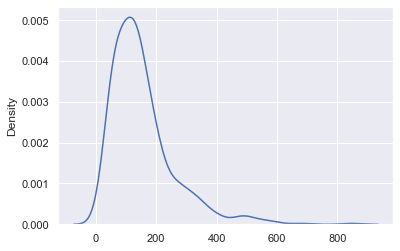

In [31]:
x = trans_x_train["Insulin"].values
sns.kdeplot(x)
plt.show()

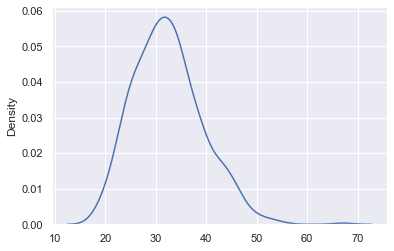

In [32]:
x = trans_x_train["BMI"].values
sns.kdeplot(x)
plt.show()

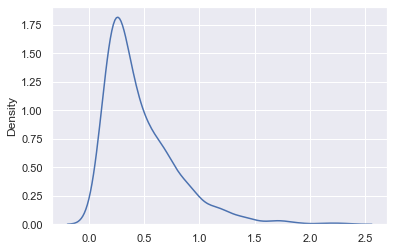

In [33]:
x = trans_x_train["DiabetesPedigreeFunction"].values
sns.kdeplot(x)
plt.show()

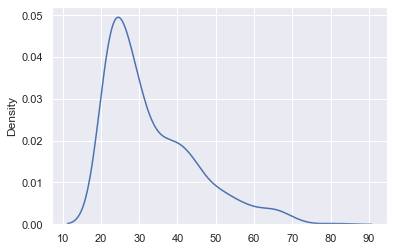

In [34]:
x = trans_x_train["Age"].values
sns.kdeplot(x)
plt.show()

### Normalization & Standardization

<AxesSubplot:>

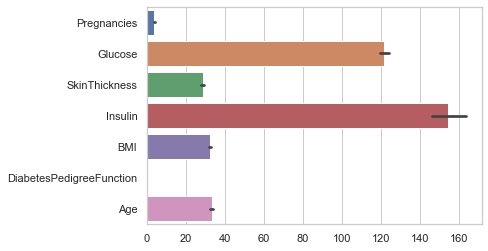

In [35]:
sns.set_theme(style="whitegrid")
sns.barplot(data=trans_x_train, orient='h')

feature scaling

* scaler
    - MaxAbsScaler
    - MinMaxScaler
    - Normalizer
    - PowerTransformer
    - QuantileTransformer
    - RobustScaler
    - StandardScaler

Scaling methods affect differenctly on diffrent classifier.  
- Distance-based classifiers like SVM, KNN, and MLP dramatically benefit from scaling.
- Trees (CART, RF), that are agnostic to some of the scaling method

train data로 scaling fit

<AxesSubplot:>

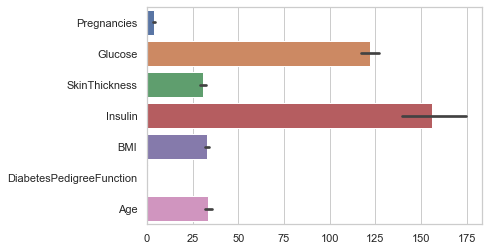

In [36]:
sns.set_theme(style="whitegrid")
sns.barplot(data=trans_x_test, orient='h')

In [37]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, PowerTransformer, QuantileTransformer, RobustScaler

scaler = QuantileTransformer()
scaled_x_train_data = scaler.fit_transform(trans_x_train)

scaled_x_train_data = pd.DataFrame(scaled_x_train_data, columns=trans_x_train.columns, index=list(trans_x_train.index.values))

In [38]:
scaled_x_test_data = scaler.transform(trans_x_test)

scaled_x_test_data = pd.DataFrame(scaled_x_test_data, columns=trans_x_test.columns, index=list(trans_x_test.index.values))

<AxesSubplot:>

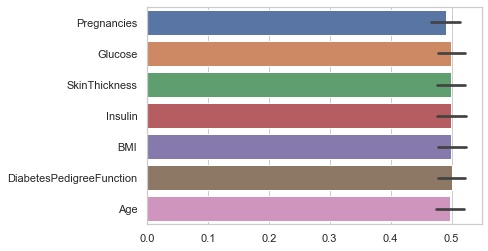

In [39]:
sns.set_theme(style="whitegrid")
sns.barplot(data=scaled_x_train_data, orient='h')

<AxesSubplot:>

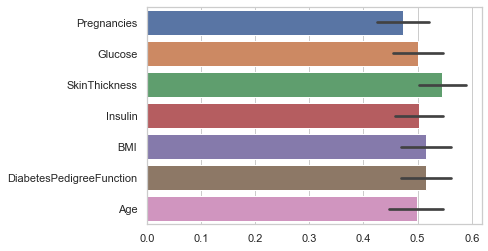

In [40]:
sns.set_theme(style="whitegrid")
sns.barplot(data=scaled_x_test_data, orient='h')

In [41]:
scaled_x_train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 435 to 556
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               614 non-null    float64
 1   Glucose                   614 non-null    float64
 2   SkinThickness             614 non-null    float64
 3   Insulin                   614 non-null    float64
 4   BMI                       614 non-null    float64
 5   DiabetesPedigreeFunction  614 non-null    float64
 6   Age                       614 non-null    float64
dtypes: float64(7)
memory usage: 38.4 KB


In [42]:
scaled_x_test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154 entries, 306 to 490
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               154 non-null    float64
 1   Glucose                   154 non-null    float64
 2   SkinThickness             154 non-null    float64
 3   Insulin                   154 non-null    float64
 4   BMI                       154 non-null    float64
 5   DiabetesPedigreeFunction  154 non-null    float64
 6   Age                       154 non-null    float64
dtypes: float64(7)
memory usage: 9.6 KB


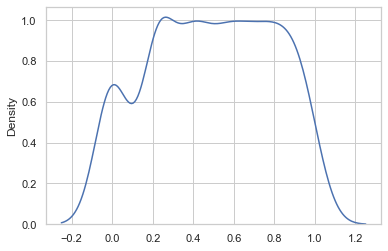

In [43]:
x = scaled_x_train_data["Pregnancies"].values
sns.kdeplot(x)
plt.show()

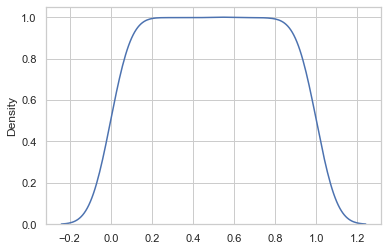

In [44]:
x = scaled_x_train_data["Glucose"].values
sns.kdeplot(x)
plt.show()

In [45]:
# x = scaled_x_test_data["SkinThickness"].values
# sns.kdeplot(x)
# plt.show()

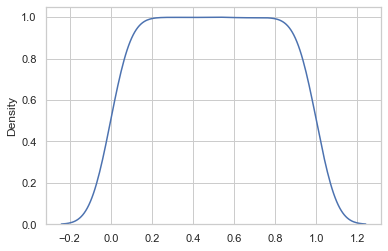

In [46]:
x = scaled_x_train_data["Insulin"].values
sns.kdeplot(x)
plt.show()

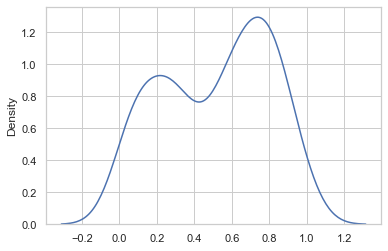

In [47]:
x = scaled_x_test_data["BMI"].values
sns.kdeplot(x)
plt.show()

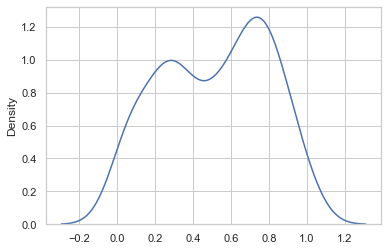

In [48]:
x = scaled_x_test_data["DiabetesPedigreeFunction"].values
sns.kdeplot(x)
plt.show()

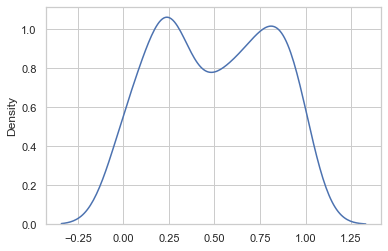

In [49]:
x = scaled_x_test_data["Age"].values
sns.kdeplot(x)
plt.show()

## Prediction by Model

### Evaluation Metric

ROC AUC

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score

In [51]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)

    # ROC-AUC 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('confusion matrix')
    print(confusion)

    # ROC-AUC print
    print(f'정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f}, F1: {f1:.4f}, AUC: {roc_auc:.4f}')


In [52]:
def roc_curve_plot(y_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음. 
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림. 
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Specificity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()

In [53]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8, 6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

In [54]:
def predict_by_model(model):
    model.fit(scaled_x_train_data, train_label)
    prediction = model.predict(scaled_x_test_data)
    pred_proba = model.predict_proba(scaled_x_test_data)[:,1]
    get_clf_eval(test_label, prediction, pred_proba)
    model_score = roc_auc_score(test_label, prediction)
    print(f'ROC AUC Score : {model_score:.5f}')
    roc_curve_plot(test_label, pred_proba)
    precision_recall_curve_plot(test_label, pred_proba)
    return prediction

confusion matrix
[[82 15]
 [24 33]]
정확도: 0.7468, 정밀도: 0.6875, 재현율: 0.5789, F1: 0.6286, AUC: 0.8092
ROC AUC Score : 0.71215


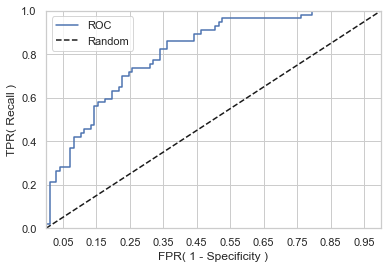

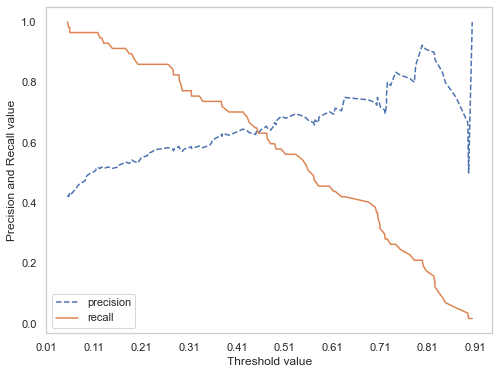

In [55]:
lr_pred = predict_by_model(LogisticRegression())

confusion matrix
[[83 14]
 [29 28]]
정확도: 0.7208, 정밀도: 0.6667, 재현율: 0.4912, F1: 0.5657, AUC: 0.7948
ROC AUC Score : 0.67345


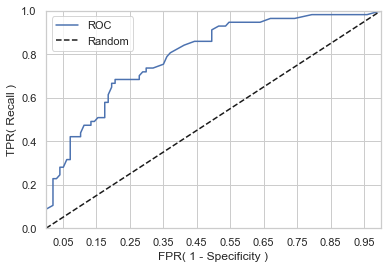

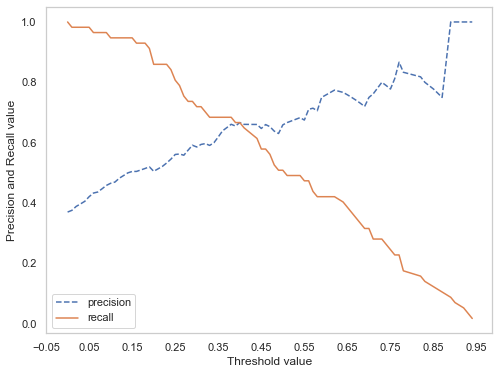

In [56]:
rf_pred = predict_by_model(RandomForestClassifier(random_state=128))

confusion matrix
[[77 20]
 [19 38]]
정확도: 0.7468, 정밀도: 0.6552, 재현율: 0.6667, F1: 0.6609, AUC: 0.8112
ROC AUC Score : 0.73024


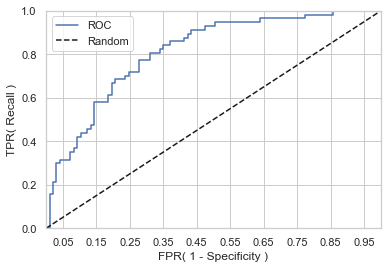

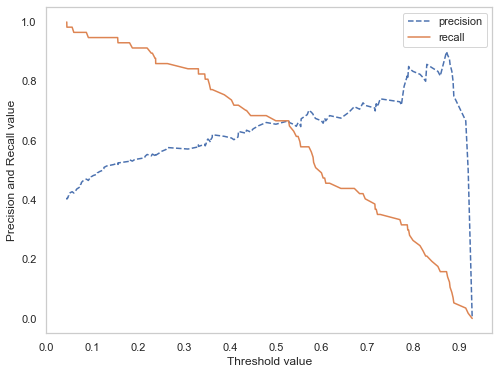

In [57]:
mlp_pred = predict_by_model(MLPClassifier())

confusion matrix
[[69 28]
 [21 36]]
정확도: 0.6818, 정밀도: 0.5625, 재현율: 0.6316, F1: 0.5950, AUC: 0.7549
ROC AUC Score : 0.67146


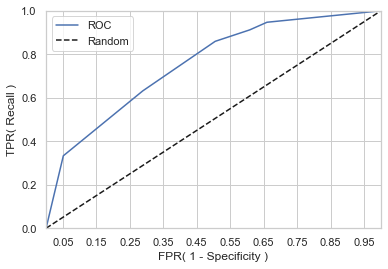

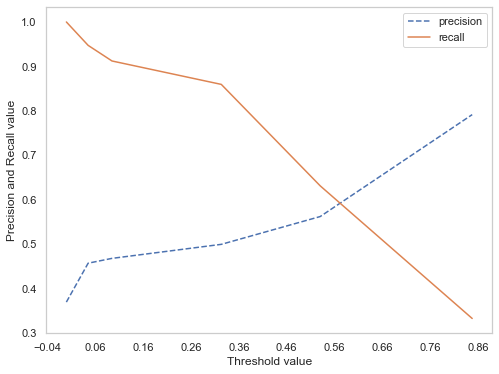

In [58]:
cart_pred = predict_by_model(DecisionTreeClassifier(random_state=3, max_depth=3))

confusion matrix
[[75 22]
 [24 33]]
정확도: 0.7013, 정밀도: 0.6000, 재현율: 0.5789, F1: 0.5893, AUC: 0.7445
ROC AUC Score : 0.67607


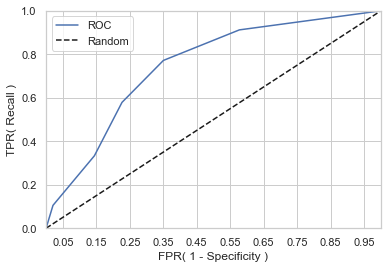

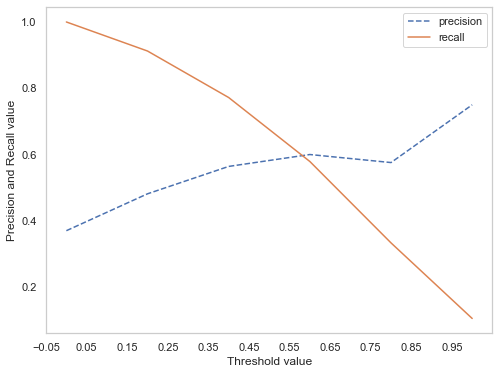

In [59]:
knn_pred = predict_by_model(KNeighborsClassifier())

confusion matrix
[[74 23]
 [17 40]]
정확도: 0.7403, 정밀도: 0.6349, 재현율: 0.7018, F1: 0.6667, AUC: 0.8000
ROC AUC Score : 0.73232


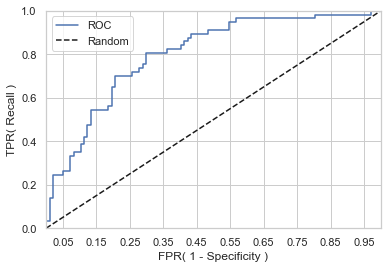

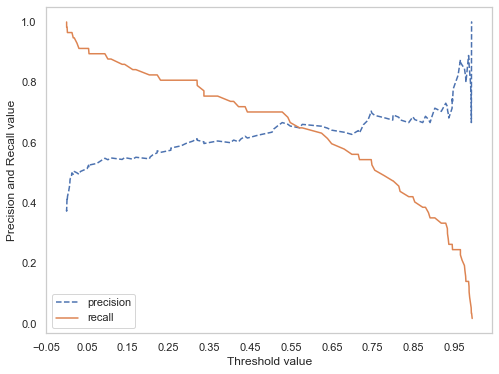

In [60]:
nb_pred = predict_by_model(GaussianNB())

## Submission

## Result

1. no-zero data imputation / features_drop=['BloodPressure','SkinThickness'] / LogisticRegression  
=> 정확도: 0.7403, 정밀도: 0.6977, 재현율: 0.5263, F1: 0.6000, AUC: 0.8336  
=> ROC AUC Score : 0.69615  

2. zero data mean imputation / features_drop=['BloodPressure','SkinThickness'] / StandardScaling / LogisticRegression  
    => 정확도: 0.7338, 정밀도: 0.6818, 재현율: 0.5263, F1: 0.5941, AUC: 0.8323  
    => ROC AUC Score : 0.69099  


3. zero data mean imputation / features_drop=[None] / StandardScaling / LogisticRegression  
    => confusion matrix  
        [[83 14]  
        [25 32]]  
    => 정확도: 0.7468, 정밀도: 0.6957, 재현율: 0.5614, F1: 0.6214, AUC: 0.8320  
    => ROC AUC Score : 0.70854  

4. zero data mean imputation / features_drop=[None] / MinMaxScaling / LogisticRegression  
    => confusion matrix  
        [[85 12]  
         [27 30]]  
    => 정확도: 0.7468, 정밀도: 0.7143, 재현율: 0.5263, F1: 0.6061, AUC: 0.8291  
    => ROC AUC Score : 0.70130  

5. zero data mean imputation / features_drop=[None] / QuantileTransformer / MLPClassifier    
    => confusion matrix  
        [[82 15]  
        [23 34]]   
    => 정확도: 0.7532, 정밀도: 0.6939, 재현율: 0.5965, F1: 0.6415, AUC: 0.8208    
    => ROC AUC Score : 0.72093  

6. zero data mean imputation / features_drop=['BloodPressure'] / QuantileTransformer / MLPClassifier    
    => confusion matrix  
        [[76 21]  
         [19 38]]  
    => 정확도 : 0.7403, 정밀도: 0.6441, 재현율: 0.6667, F1: 0.6552, AUC: 0.8218  
    => ROC AUC Score : 0.72509   

7. zero data KNNInputer / features_drop=['BloodPressure'] / QuantileTransformer / GaussianNB  
    => confusion matrix  
        [[74 23]  
         [17 40]]  
    => 정확도: 0.7403, 정밀도: 0.6349, 재현율: 0.7018, F1: 0.6667, AUC: 0.8000  
    => ROC AUC Score : 0.73232  